In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from unidecode import unidecode

mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 14

In [2]:
df_com = pd.read_csv("./DATA/MOTOS/motos.csv")

C:\Users\CP-ERICSSON\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (22,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(df_com.info())
df_com.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286882 entries, 0 to 286881
Data columns (total 26 columns):
Fecha                 286882 non-null object
Departamento          286882 non-null object
Municipio             286881 non-null object
Día                   286882 non-null object
Hora                  286882 non-null object
Barrio                283195 non-null object
Zona                  286882 non-null object
Clase de sitio        286744 non-null object
Arma empleada         286280 non-null object
Móvil Agresor         280334 non-null object
Móvil Victima         281585 non-null object
Edad                  284230 non-null float64
Sexo                  286750 non-null object
Estado civil          281708 non-null object
País de nacimiento    272714 non-null object
Clase de empleado     286750 non-null object
Profesión             59629 non-null object
Escolaridad           280982 non-null object
Código DANE           286881 non-null float64
CLASE                 286882 non-

,Fecha,Departamento,Municipio,Día,Hora,Barrio,Zona,Clase de sitio,Arma empleada,Móvil Agresor,...,Profesión,Escolaridad,Código DANE,CLASE,MARCA,LINEA,MODELO,COLOR,Cantidad,anio
0,01/01/2018,ANTIOQUIA,APARTADÓ,Lunes,17:00:00,ALFONSO LOPEZ,URBANA,VIAS PUBLICAS,SIN EMPLEO DE ARMAS,A PIE,...,NaN,SECUNDARIA,5045000.0,MOTOCICLETA,AKT,LINEA STANDARD,2014,NEGRO GRAFITO,1,"2,018"
1,01/01/2018,ANTIOQUIA,BELLO,Lunes,03:00:00,SAN JOSE OBRERO,URBANA,FRENTE A RESIDENCIAS - VIA PUBLICA,LLAVE MAESTRA,A PIE,...,NaN,SECUNDARIA,5088000.0,MOTOCICLETA,AKT,AK125 NKDR,2000,NEGRO,1,"2,018"
2,01/01/2018,ANTIOQUIA,DON MATÍAS,Lunes,18:30:00,QUEBRADA ARRIBA,RURAL,FINCAS Y SIMILARES,LLAVE MAESTRA,A PIE,...,NaN,SECUNDARIA,5237000.0,MOTOCICLETA,AUTECO,SPIKE 125,2008,AZUL BALTICO,1,"2,018"
3,01/01/2018,ANTIOQUIA,ENVIGADO,Lunes,05:00:00,LA SEBASTIANA,URBANA,PARQUEADERO,LLAVE MAESTRA,A PIE,...,NaN,SECUNDARIA,5266000.0,MOTOCICLETA,LML,M10B1,2001,VERDE,1,"2,018"
4,01/01/2018,ANTIOQUIA,MEDELLÍN (CT),Lunes,10:00:00,SAN JAVIER 1 C-13,URBANA,FRENTE A RESIDENCIAS - VIA PUBLICA,LLAVE MAESTRA,A PIE,...,NaN,SECUNDARIA,5001000.0,MOTOCICLETA,AUTECO BAJAJ,BOXER 100 CT,2017,NEGRO,1,"2,018"


In [4]:
###limpieza indices###

# Eliminar acentos en el nombre de las columnas
df_com.columns = [unidecode(str(col)) for col in df_com.columns]

# Reemplazar espacios por _
df_com.columns = df_com.columns.str.replace(' ', '_')
    
# Strip
df_com.columns = df_com.columns.str.strip()

# Reemplazar espacios por _
df_com.columns = df_com.columns.str.lower()

#  Reemplazar NaN, None
df_com.replace('-', np.nan, inplace=True)

# Set axis name
df_com.rename_axis('id', inplace=True)

# cambio formato fecha
df_com['fecha'] = pd.to_datetime(df_com['fecha'])

# borrar columna anio
del df_com['anio']

In [5]:
df_com.columns

Index(['fecha', 'departamento', 'municipio', 'dia', 'hora', 'barrio', 'zona',
       'clase_de_sitio', 'arma_empleada', 'movil_agresor', 'movil_victima',
       'edad', 'sexo', 'estado_civil', 'pais_de_nacimiento',
       'clase_de_empleado', 'profesion', 'escolaridad', 'codigo_dane', 'clase',
       'marca', 'linea', 'modelo', 'color', 'cantidad'],
      dtype='object')

In [11]:
df_com

,fecha,departamento,municipio,dia,hora,barrio,zona,clase_de_sitio,arma_empleada,movil_agresor,...,clase_de_empleado,profesion,escolaridad,codigo_dane,clase,marca,linea,modelo,color,cantidad
id,,,,,,,,,,,,,,,,,,,,,
0,2018-01-01,ANTIOQUIA,APARTADÓ,Lunes,17:00:00,ALFONSO LOPEZ,URBANA,VIAS PUBLICAS,SIN EMPLEO DE ARMAS,A PIE,...,EMPLEADO PARTICULAR,NaN,SECUNDARIA,5045000.0,MOTOCICLETA,AKT,LINEA STANDARD,2014,NEGRO GRAFITO,1
1,2018-01-01,ANTIOQUIA,BELLO,Lunes,03:00:00,SAN JOSE OBRERO,URBANA,FRENTE A RESIDENCIAS - VIA PUBLICA,LLAVE MAESTRA,A PIE,...,EMPLEADO PARTICULAR,NaN,SECUNDARIA,5088000.0,MOTOCICLETA,AKT,AK125 NKDR,2000,NEGRO,1
2,2018-01-01,ANTIOQUIA,DON MATÍAS,Lunes,18:30:00,QUEBRADA ARRIBA,RURAL,FINCAS Y SIMILARES,LLAVE MAESTRA,A PIE,...,EMPLEADO PARTICULAR,NaN,SECUNDARIA,5237000.0,MOTOCICLETA,AUTECO,SPIKE 125,2008,AZUL BALTICO,1
3,2018-01-01,ANTIOQUIA,ENVIGADO,Lunes,05:00:00,LA SEBASTIANA,URBANA,PARQUEADERO,LLAVE MAESTRA,A PIE,...,INDEPENDIENTE,NaN,SECUNDARIA,5266000.0,MOTOCICLETA,LML,M10B1,2001,VERDE,1
4,2018-01-01,ANTIOQUIA,MEDELLÍN (CT),Lunes,10:00:00,SAN JAVIER 1 C-13,URBANA,FRENTE A RESIDENCIAS - VIA PUBLICA,LLAVE MAESTRA,A PIE,...,EMPLEADO PARTICULAR,NaN,SECUNDARIA,5001000.0,MOTOCICLETA,AUTECO BAJAJ,BOXER 100 CT,2017,NEGRO,1
5,2018-01-01,ANTIOQUIA,MEDELLÍN (CT),Lunes,13:00:00,ARANJUEZ C-4,URBANA,VIAS PUBLICAS,ARMA DE FUEGO,PASAJERO MOTOCICLETA,...,NO REPORTA,NaN,SECUNDARIA,5001000.0,MOTOCICLETA,AKT,AK 150TT,2014,NEGRO,1
6,2018-01-01,ANTIOQUIA,MEDELLÍN (CT),Lunes,04:30:00,TOSCANA C-5,URBANA,VIAS PUBLICAS,SIN EMPLEO DE ARMAS,PASAJERO MOTOCICLETA,...,NO REPORTA,NaN,SECUNDARIA,5001000.0,MOTOCICLETA,BAJAJ,BOXER CT 100,2018,NEGRO,1
7,2018-01-01,ANTIOQUIA,NECOCLÍ,Lunes,01:00:00,CENTRO,URBANA,VIAS PUBLICAS,SIN EMPLEO DE ARMAS,A PIE,...,EMPLEADO PARTICULAR,NaN,SECUNDARIA,5490000.0,MOTOCICLETA,AUTECO,LINEA STANDARD,2015,NEGRO Y NIQUEL,1
8,2018-01-01,ANTIOQUIA,PUERTO TRIUNFO,Lunes,06:00:00,UNICO,URBANA,FRENTE A RESIDENCIAS - VIA PUBLICA,SIN EMPLEO DE ARMAS,A PIE,...,EMPLEADO PARTICULAR,NaN,SECUNDARIA,5591000.0,MOTOCICLETA,VICTORY,MRX150,2015,BLANCO,1


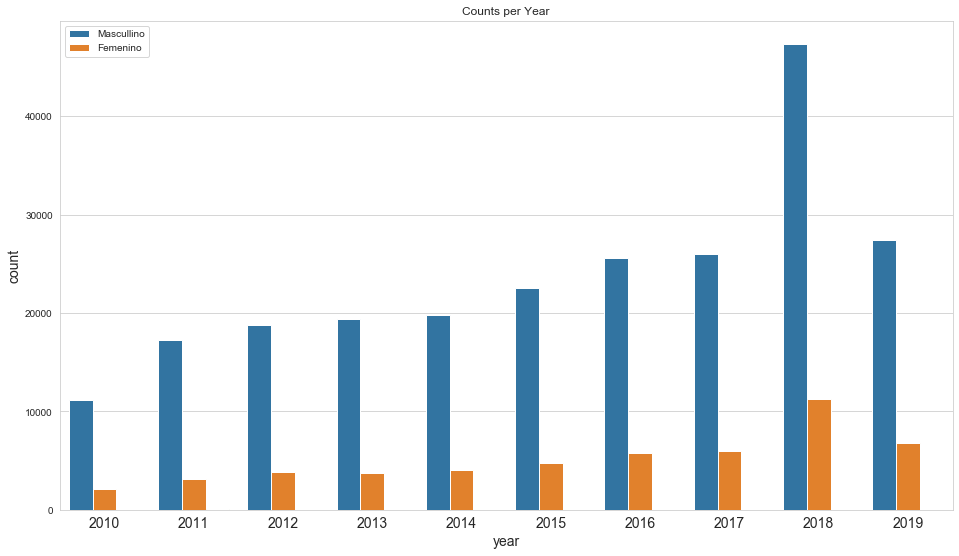

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,9))
ax = sns.countplot(
    data=df_com.assign(year = lambda df: df.fecha.dt.year),
    x='year',
    hue='sexo'
)

ax.set_title('Counts per Year');
ax.legend(['Mascullino', 'Femenino']);

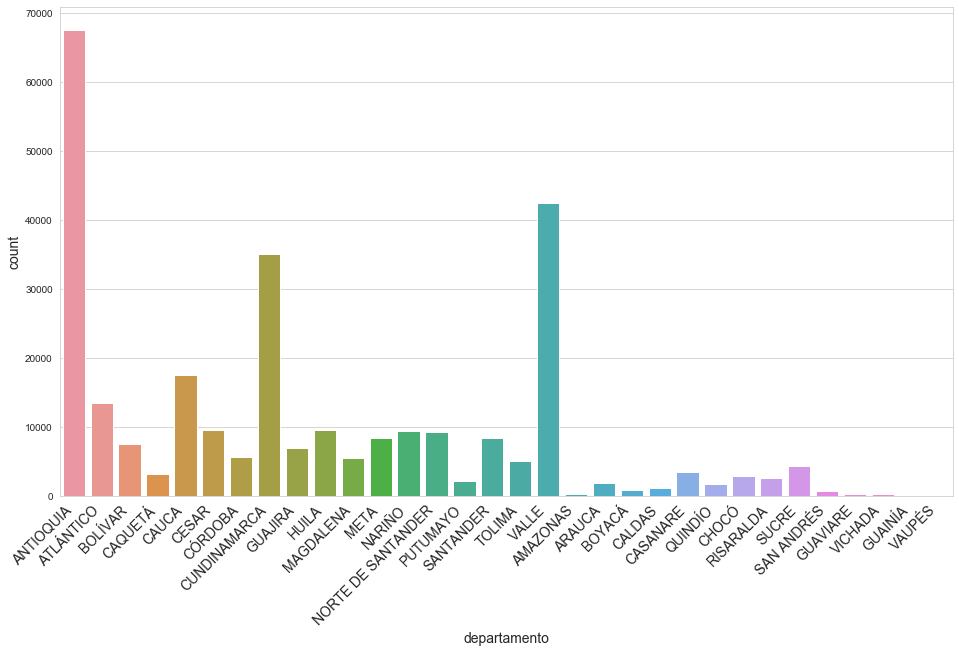

In [7]:
plt.figure(figsize=(16,9))
ax = sns.countplot(
    data=df_com,
    x='departamento'
)

plt.xticks(rotation=45,ha='right');

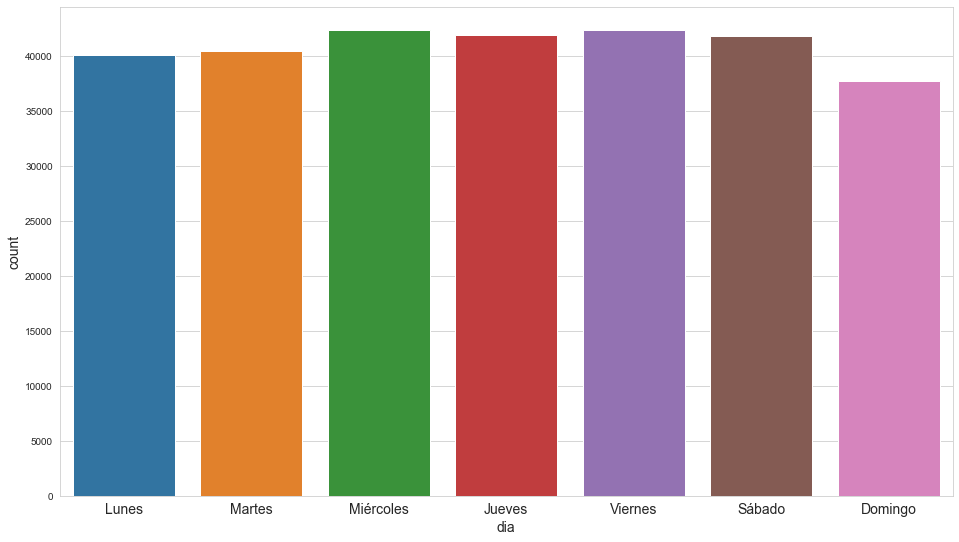

In [8]:
plt.figure(figsize=(16,9))

order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
ax = sns.countplot(
    data=df_com,
    x='dia',
    order=order
)

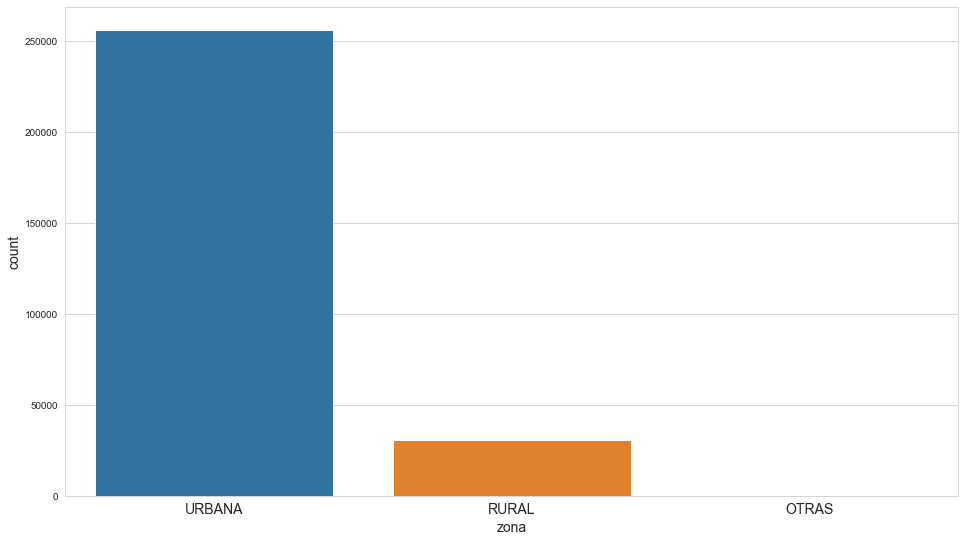

In [9]:
plt.figure(figsize=(16,9))
ax = sns.countplot(
    data=df_com,
    x='zona',
)

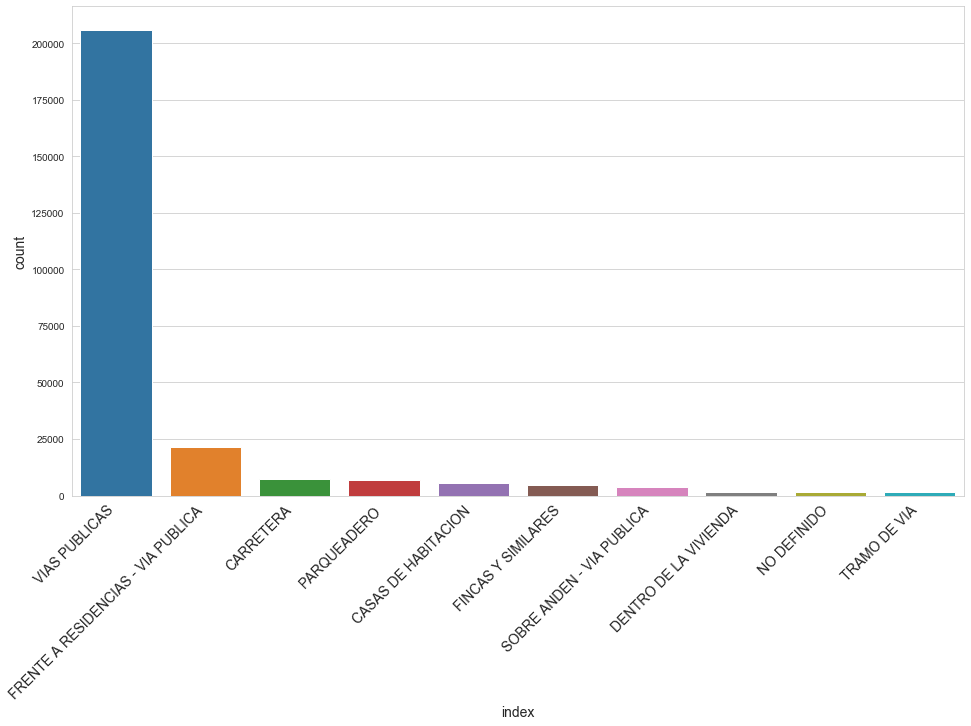

In [10]:
plt.figure(figsize=(16,9))

sns.barplot(
    data=df_com.clase_de_sitio.value_counts().head(10).to_frame(name='count').reset_index(),
    x='index',
    y='count'
) 

plt.xticks(rotation=45, ha='right');